In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [109]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [101]:
target = np.log(train.SalePrice)

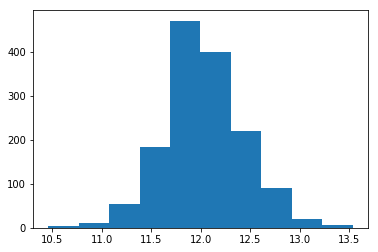

In [8]:
plt.hist(target)
plt.show()

In [9]:
num_feat = train.select_dtypes(include=[np.number])
corr = num_feat.corr()

In [12]:
print(corr['SalePrice'].sort_values(ascending = False)[-5:])

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


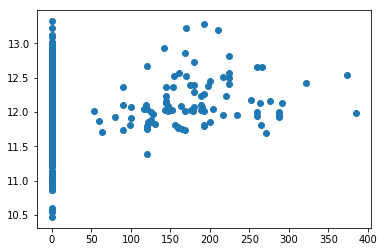

In [114]:
plt.scatter(x = num_feat['ScreenPorch'], y = target)

In [98]:
train = train[train['MiscVal'] < 2500]

In [20]:
num_feat.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [112]:
#num_feat = train.select_dtypes(include=[np.number])
num_feat.shape

(1170, 38)

In [106]:
cat_feat = train.select_dtypes(include=[np.object])

In [107]:
cat_feat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [108]:
train['Street'].value_counts()

Pave    1166
Grvl       4
Name: Street, dtype: int64

In [110]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [111]:
train.enc_street.value_counts()

1    1454
0       6
Name: enc_street, dtype: int64

In [132]:
data = num_feat.interpolate().dropna()
data.shape

(1170, 38)

In [115]:
y = target
X = data.drop(['SalePrice', 'Id'], axis=1)

In [118]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [120]:
model = linear_model.LinearRegression()

In [121]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
model.score(X_test, y_test)

0.8917333647885924

In [123]:
predictions = model.predict(X_test)

In [124]:
from sklearn.metrics import mean_squared_error

In [139]:
mean_squared_error(y_test, predictions)

0.01743243742285712

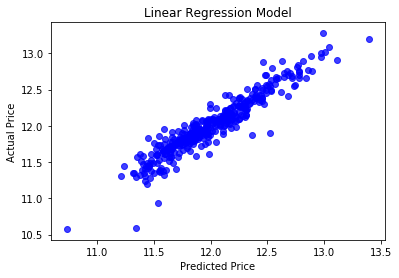

In [126]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [128]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [137]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id','enc_street'], axis=1).interpolate()

In [138]:
feats.shape

(1459, 36)

In [140]:
predictions = model.predict(feats)

In [142]:
predictions = np.exp(predictions)

In [144]:
submission['SalePrice'] = predictions

In [145]:
submission.head()

,Id,SalePrice
0,1461,123534.979329
1,1462,143902.732872
2,1463,178261.424635
3,1464,195589.413153
4,1465,182580.119253


In [146]:
submission.to_csv('submission_1.csv', index = False)